<a href="https://colab.research.google.com/github/Yajie-Xu/HuggingFace-Course-NLP/blob/main/course/en/chapter3/section2_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing the data (PyTorch)

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [3]:
!pip install datasets evaluate transformers[sentencepiece]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.7 MB/s eta 0:00:00


In [15]:
from rich import print

In [1]:
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

# Same as before
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

# This is new
batch["labels"] = torch.tensor([1, 1])

optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()
optimizer.step()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [2]:
optimizer

AdamW (
Parameter Group 0
    betas: (0.9, 0.999)
    correct_bias: True
    eps: 1e-06
    lr: 0.001
    weight_decay: 0.0
)

In [4]:
loss

tensor(0.5396, grad_fn=<NllLossBackward0>)

## Loading a dataset from the Hub


In [4]:
#pip install datasets (the first line of this doc)

from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc") #  MRPC dataset - one of the 10 datasets composing the GLUE benchmark
raw_datasets

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/649k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/75.7k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/308k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

* sets: training set, the validation set, and the test set.
* columns: sentence1, sentence2, label, and idx
* rows: 3,668 pairs of sentences in the training set, 408 in the validation set, and 1,725 in the test set.

This command downloads and caches the dataset, by default in *~/.cache/huggingface/datasets*. Recall from Chapter 2 that you can customize your cache folder by setting the `HF_HOME` environment variable.



### Access each pair of sentences
in our raw_datasets object by indexing, like with a dictionary:



In [5]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

In [6]:
raw_train_dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

> ✏️ Try it out! Look at element 15 of the training set and element 87 of the validation set. What are their labels?

In [7]:
import pprint

pp = pprint.PrettyPrinter(indent=2)

print("15:")
pp.pprint(raw_train_dataset[15])  # label: 0 - not_equivalent

print("\n87:")
pp.pprint(raw_train_dataset[87])  # label: 1 - equivalent

15:
{ 'idx': 16,
  'label': 0,
  'sentence1': 'Rudder was most recently senior vice president for the '
               'Developer & Platform Evangelism Business .',
  'sentence2': 'Senior Vice President Eric Rudder , formerly head of the '
               'Developer and Platform Evangelism unit , will lead the new '
               'entity .'}

87:
{ 'idx': 100,
  'label': 1,
  'sentence1': 'Tuition at four-year private colleges averaged $ 19,710 this '
               'year , up 6 percent from 2002 .',
  'sentence2': 'For the current academic year , tuition at public colleges '
               'averaged $ 4,694 , up almost $ 600 from the year before .'}


## Preprocessing a dataset

### Tokenizer one pair of sentences

In [46]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(raw_datasets["train"]["sentence1"])
tokenized_sentences_2 = tokenizer(raw_datasets["train"]["sentence2"])

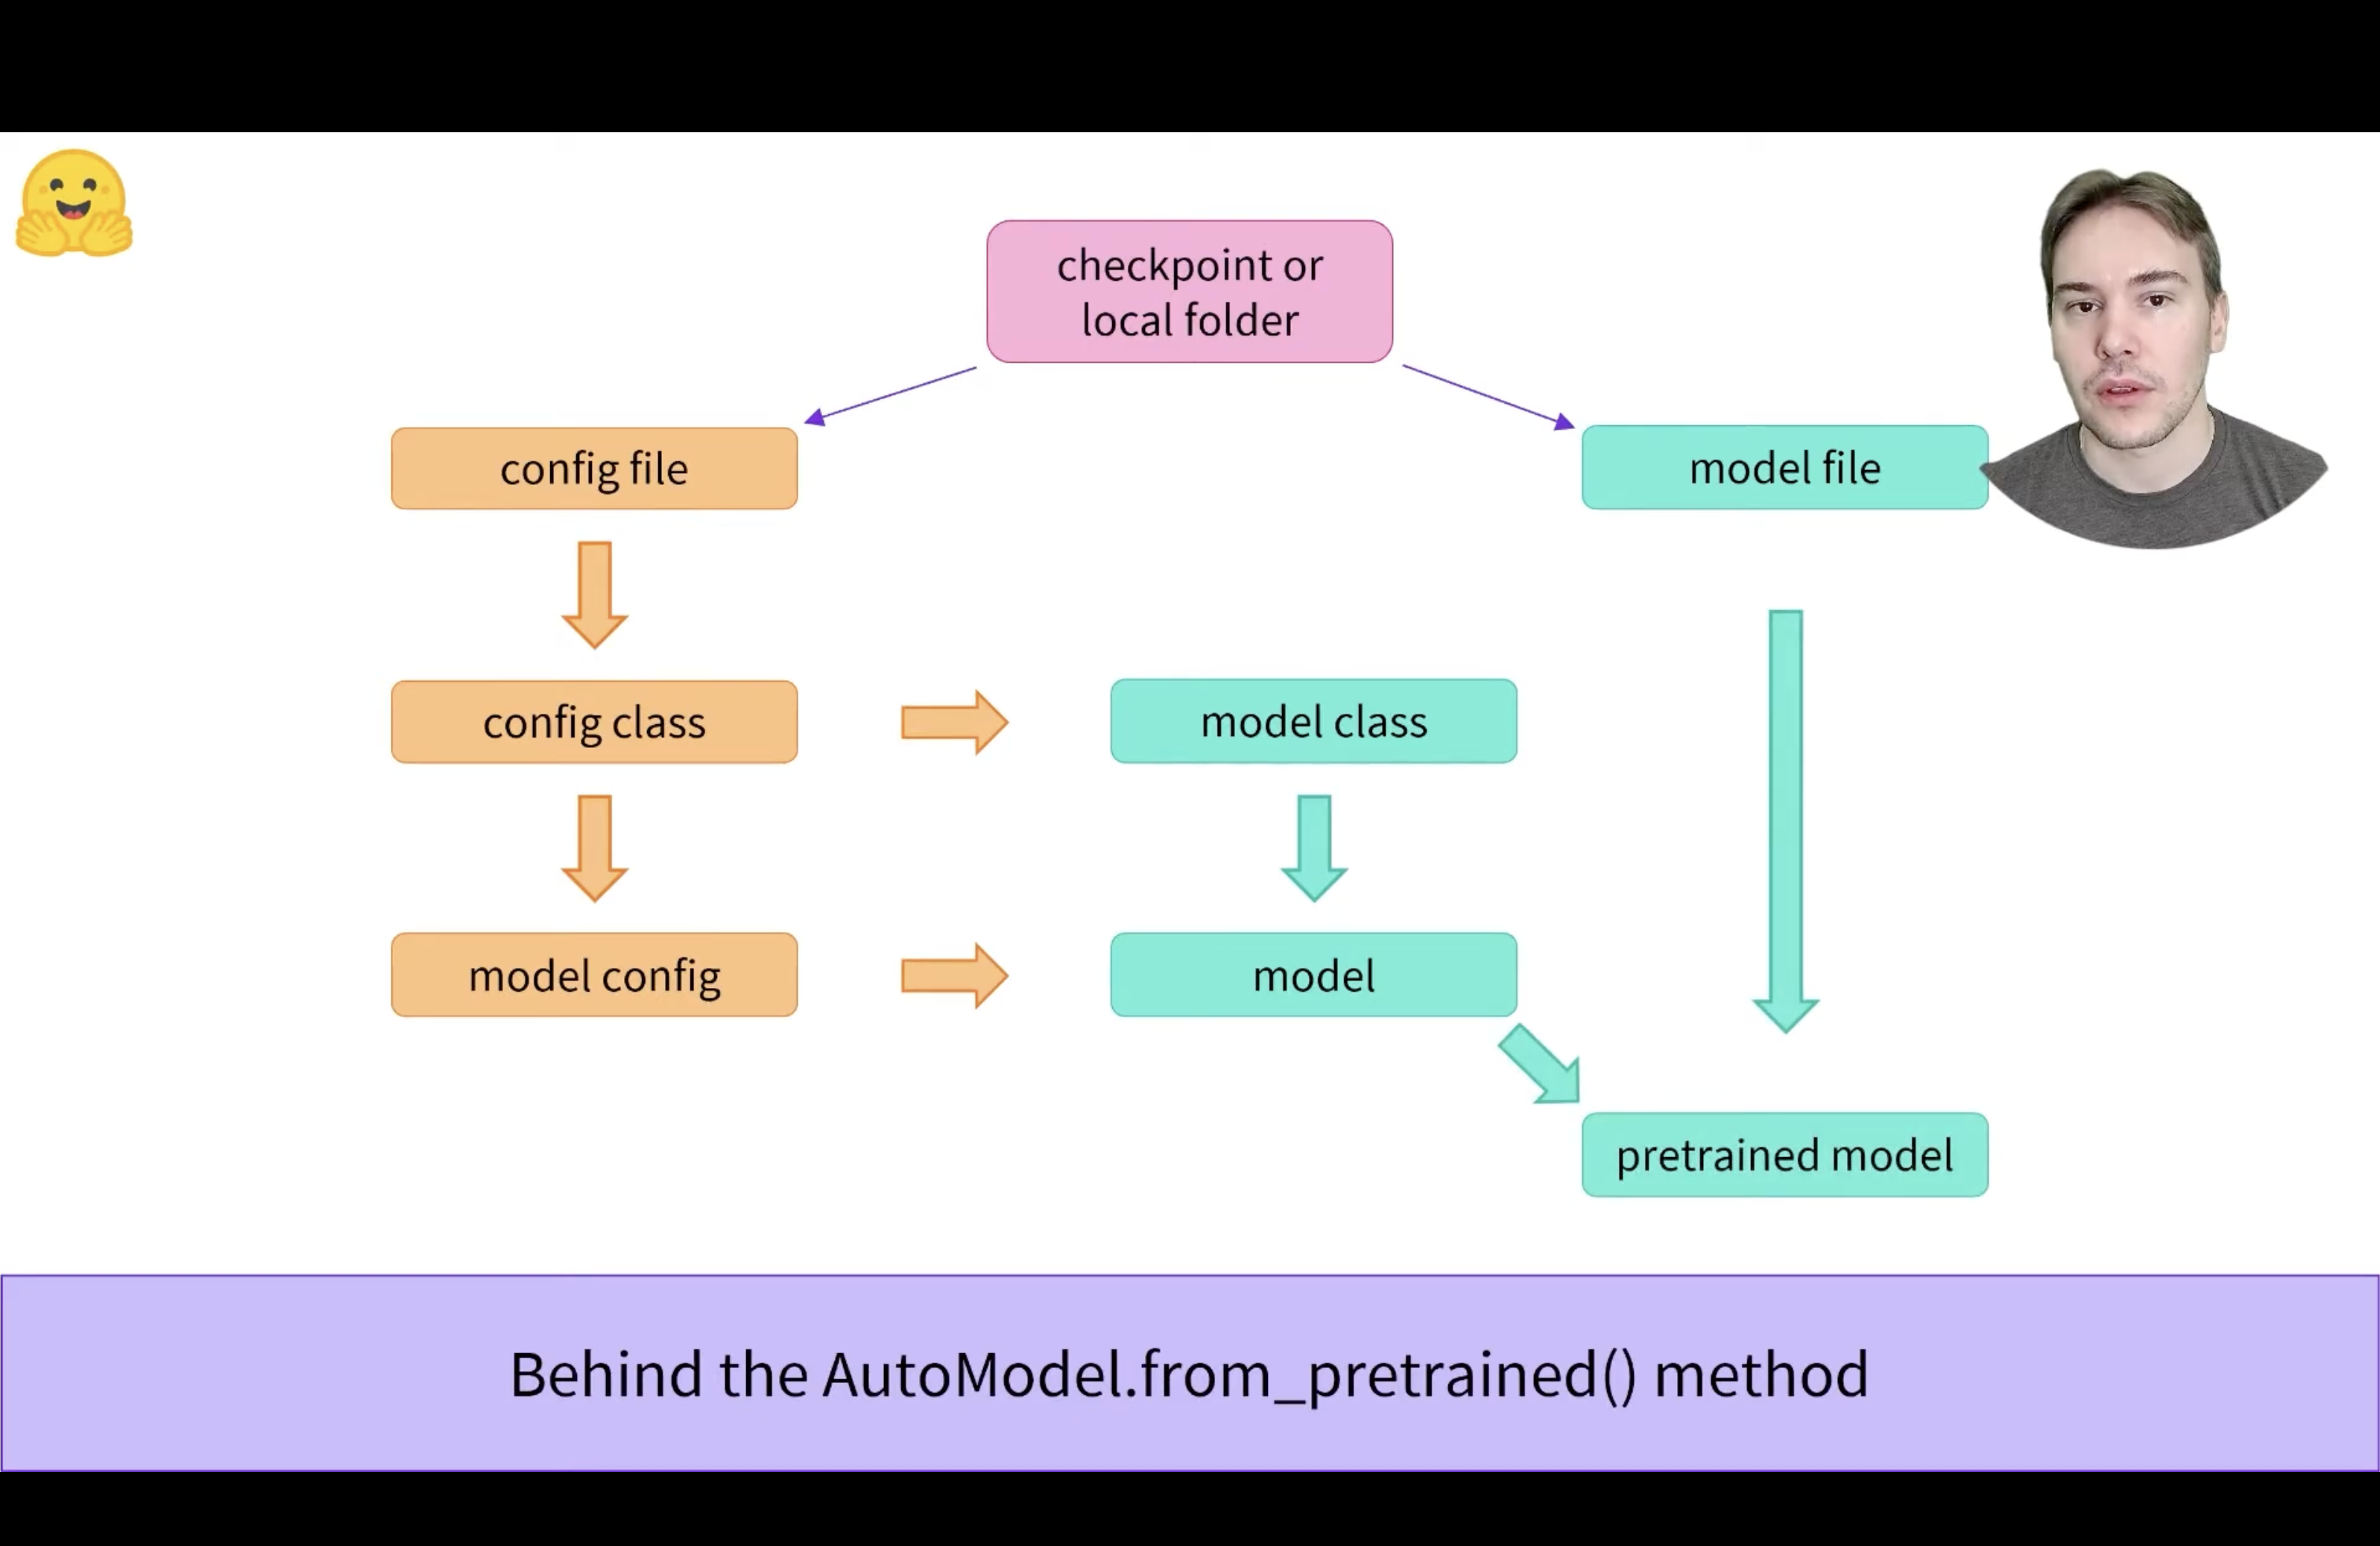

In [47]:
print("sentences_1:", tokenized_sentences_1[0])
print("\nsentences_2:", tokenized_sentences_2[1])

sentences_1: Encoding(num_tokens=25, attributes=[ids, type_ids, tokens, offsets, attention_mask, 
special_tokens_mask, overflowing])

sentences_2: Encoding(num_tokens=33, attributes=[ids, type_ids, tokens, offsets, attention_mask, 
special_tokens_mask, overflowing])

In [48]:
inputs = tokenizer("This is the first sentence.", "This is the second one.")
print(inputs)  # Automatically structures and highlights!

{
    'input_ids': [101, 2023, 2003, 1996, 2034, 6251, 1012, 102, 2023, 2003, 1996, 2117, 2028, 1012, 102],
    'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

> `token_type_ids`: tells which tokens represent the first/ second sentence



In [50]:
# decode
pp = pprint.PrettyPrinter(indent=2, width=120, compact=True)
pp.pprint(tokenizer.convert_ids_to_tokens(inputs["input_ids"]))

['[CLS]', 'this', 'is', 'the', 'first', 'sentence', '.', '[SEP]', 'this', 'is', 'the', 'second', 'one', '.', '[SEP]']


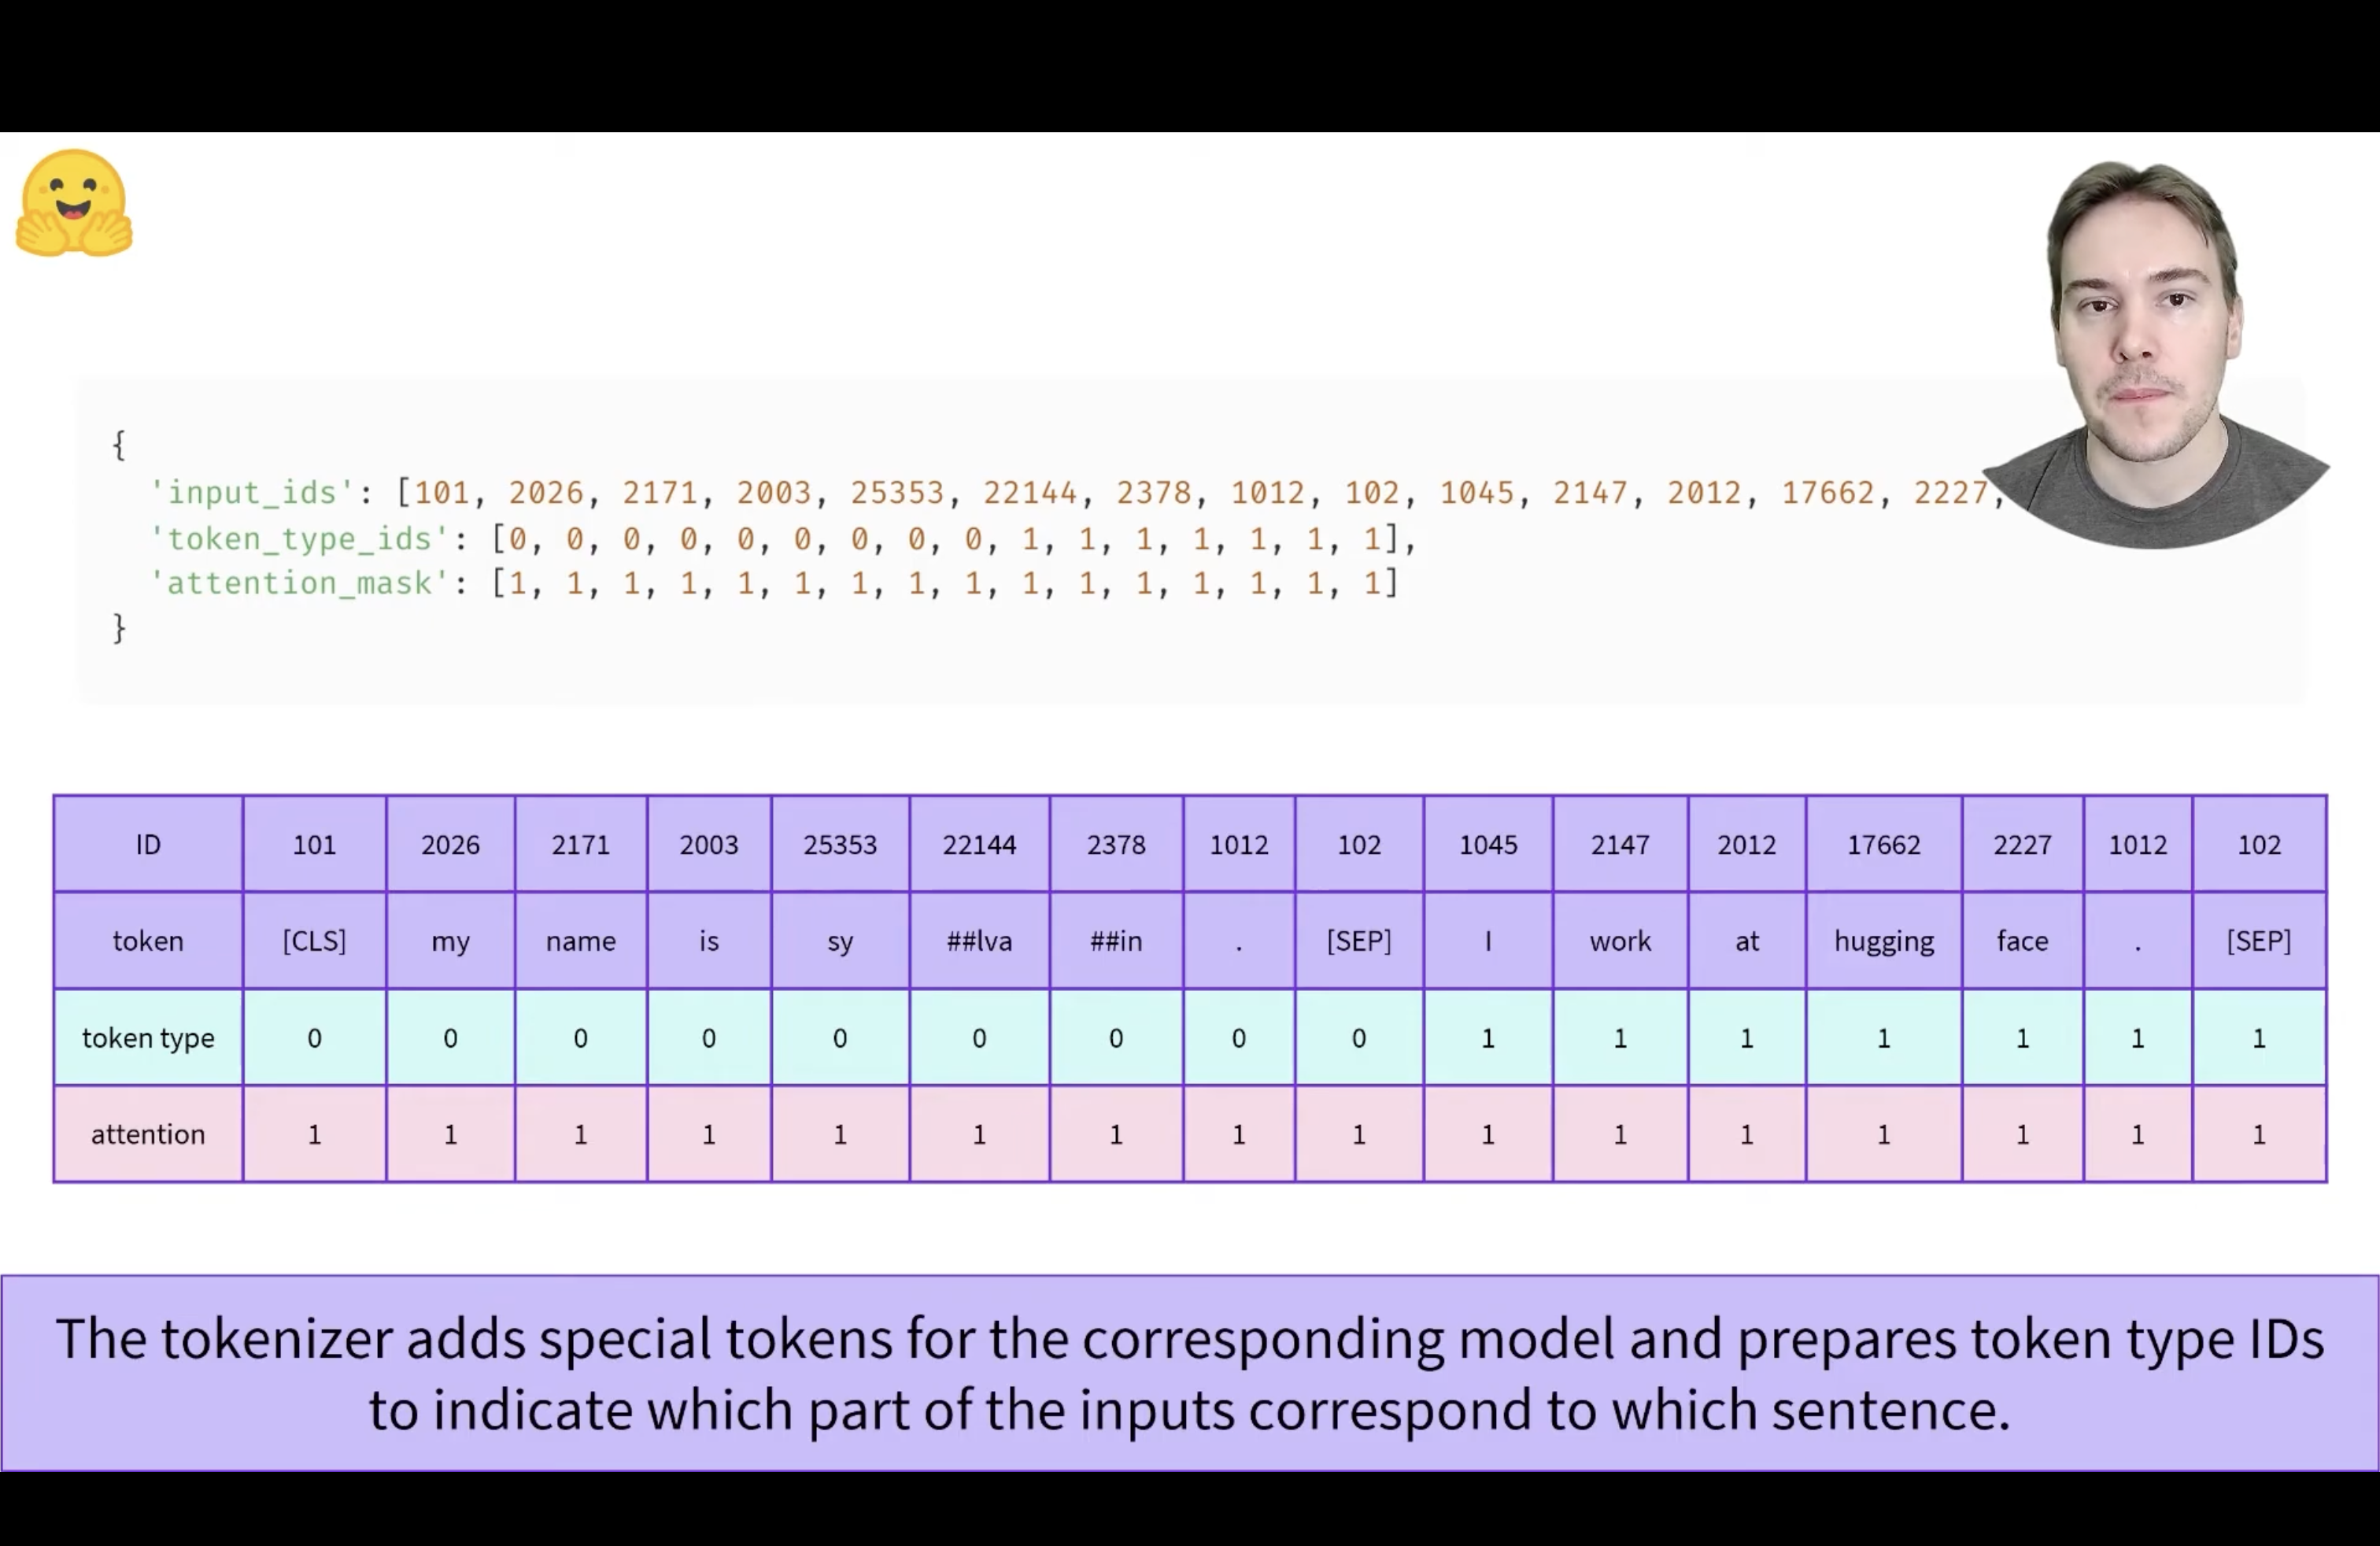

> ✏️ Try it out! Take element 15 of the training set and tokenize the two sentences separately and as a pair. What’s the difference between the two results?

In [31]:
sentence15_1 = raw_datasets["train"][15]["sentence1"]
sentence15_2 = raw_datasets["train"][15]["sentence2"]

In [57]:
print(f"{sentence15_1}\n{sentence15_2}")

Rudder was most recently senior vice president for the Developer & Platform Evangelism Business .
Senior Vice President Eric Rudder , formerly head of the Developer and Platform Evangelism unit , will lead the new
entity .

In [38]:
tokenized_dataset15 = tokenizer(sentence15_1, sentence15_2, padding=True,truncation=True)
pp = pprint.PrettyPrinter(indent=2, width=80, compact=True)
pp.pprint(tokenized_dataset15)

{ 'attention_mask': [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1],
  'input_ids': [ 101, 24049, 2001, 2087, 3728, 3026, 3580, 2343, 2005, 1996,
                 9722, 1004, 4132, 9340, 12439, 2964, 2449, 1012, 102, 3026,
                 3580, 2343, 4388, 24049, 1010, 3839, 2132, 1997, 1996, 9722,
                 1998, 4132, 9340, 12439, 2964, 3131, 1010, 2097, 2599, 1996,
                 2047, 9178, 1012, 102],
  'token_type_ids': [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      1, 1, 1, 1, 1, 1]}




---



In [60]:
# Tokenizer two pairs
from transformers import AutoTokenizer
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
toc_2 = tokenizer(
    ["My name is Sylvain.", "Going to the cinema."],
     ["I work at Hugging Face.", "This movie is great."], padding=True)
print(toc_2)

{
    'input_ids': [
        [101, 2026, 2171, 2003, 25353, 22144, 2378, 1012, 102, 1045, 2147, 2012, 17662, 2227, 1012, 102],
        [101, 2183, 2000, 1996, 5988, 1012, 102, 2023, 3185, 2003, 2307, 1012, 102, 0, 0, 0]
    ],
    'token_type_ids': [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0]
    ],
    'attention_mask': [
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
    ]
}

In [62]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
batch = tokenizer(
["My name is Sylvain.", "Going to the cinema."], ["I work at Hugging Face.", "This movie is great."], padding=True, return_tensors="pt",
)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**batch)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [64]:
print(outputs)

SequenceClassifierOutput(
    loss=None,
    logits=tensor([[0.0381, 0.0864],
        [0.1110, 0.5164]], grad_fn=<AddmmBackward0>),
    hidden_states=None,
    attentions=None
)

### Tokenize whole dataset

In [19]:
tokenized_dataset = tokenizer(
    raw_datasets["train"]["sentence1"],
    raw_datasets["train"]["sentence2"],
    padding=True,
    truncation=True,
)

In [20]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

In [21]:
# You can preprocess faster by using the option batched=True. The applied function will then receive multiple examples at each call.
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True) #  batched=True
tokenized_datasets

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

In [22]:
print(tokenized_datasets.column_names) # 'input_ids', 'token_type_ids', 'attention_mask' are from tokenize_function

{
    'train': ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
    'validation': ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
    'test': ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask']
}

### Tweak
With just a few last tweaks, your dataset is then ready for training!

In [23]:
tokenized_datasets = tokenized_datasets.remove_columns(["idx", "sentence1", "sentence2"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets = tokenized_datasets.with_format("torch")
tokenized_datasets["train"]

Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 3668
})

## Dynamic padding

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
samples = tokenized_datasets["train"][:8]
samples = {k: v for k, v in samples.items() if k not in ["idx", "sentence1", "sentence2"]}
[len(x) for x in samples["input_ids"]]

[50, 59, 47, 67, 59, 50, 62, 32]

In [ ]:
batch = data_collator(samples)
{k: v.shape for k, v in batch.items()}

{'attention_mask': torch.Size([8, 67]),
 'input_ids': torch.Size([8, 67]),
 'token_type_ids': torch.Size([8, 67]),
 'labels': torch.Size([8])}